# Solving MachineHack's 'Predicting Food Delivery Time - Hackathon by IMS Proschool'

---
The entire world is transforming digitally and our relationship with technology has grown exponentially over the last few years. We have grown closer to technology, and it has made our life a lot easier by saving time and effort. Today everything is accessible with smartphones — from groceries to cooked food and from medicines to doctors. In this hackathon, we provide you with data that is a by-product as well as a thriving proof of this growing relationship. 

When was the last time you ordered food online? And how long did it take to reach you?

In this hackathon, we are providing you with data from thousands of restaurants in India regarding the time they take to deliver food for online order. As data scientists, your goal is to predict the online order delivery time based on the given factors.

Analytics India Magazine and IMS Proschool bring to you [‘Predicting Predicting Food Delivery Time Hackathon’](https://www.machinehack.com/course/predicting-food-delivery-time-hackathon-by-ims-proschool/).

Size of training set: 11,094 records

Size of test set: 2,774 records

**FEATURES:**

* Restaurant: A unique ID that represents a restaurant.
* Location: The location of the restaurant.
* Cuisines: The cuisines offered by the restaurant.
* Average_Cost: The average cost for one person/order.
* Minimum_Order: The minimum order amount.
* Rating: Customer rating for the restaurant.
* Votes: The total number of customer votes for the restaurant.
* Reviews: The number of customer reviews for the restaurant.
* Delivery_Time: The order delivery time of the restaurant. (Target Classes) 

About IMS Proschool

IMS, since 1977, has worked towards building a long term successful career for its students. It emerged as the fourth most trusted education brands in an AC Nielsen and Brand Equity Survey. IMS Proschool is the extension of the same mission. Proschool helps individuals realize their potential by mentoring and imparting skills.

**Link to the Hackathon [here](https://www.machinehack.com/course/predicting-food-delivery-time-hackathon-by-ims-proschool/).**
 

##Mounting Google Drive 

Mount your google drive to access files in the drive, here I have uploaded all the requires datasets in to my google drive, mounted it to colab by authorising access.

In [1]:
from google.colab import drive
drive.mount("/GD")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /GD


##Loading The Data

In [0]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

We will now load the datasets using pandas by mentioning the path to the files residing in the drive as given below.

In [0]:
train = pd.read_excel("/GD/My Drive/Colab Notebooks/Food Delivery/Participants Data/Data_Train.xlsx")
test = pd.read_excel("/GD/My Drive/Colab Notebooks/Food Delivery/Participants Data/Data_Test.xlsx")

##Dataset Features

Before proceeding any further,lets have a look at the dataset and its basic features.


####Trainig Data

In [5]:
train.shape

(11094, 9)

In [6]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [7]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [8]:
train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [9]:
train.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


####Test Data

In [11]:
test.shape

(2774, 8)

In [12]:
test.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [13]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [14]:
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 173.5+ KB


In [16]:
test.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774,2774,2774,2774,2774,2774,2774,2774
unique,2401,35,881,19,9,30,580,392
top,ID_1209,"D-Block, Sector 63, Noida",North Indian,₹200,₹50,-,-,-
freq,8,221,226,820,2556,305,542,593


##Data Cleaning

We will consider the following features of training and test datasets. Here I have grouped the columns based on similarity of values which will make it easy for cleaning.

* Cleaning Average_Cost & Minimum_order columns to remove special characters and make them float variables.
* Location & Cuisines are categoriacal variables that needs to be cleaned before encoding.
* Rating, Votes & Reviews needs to be cleaned and converted to respective types.

We will delve deeper in the coming sections.



####Average_Cost	& Minimum_order

In [17]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [18]:
#Finding the unique values in Average_Cost
train['Average_Cost'].unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

The Average_Cost has an invalid value in one of its rows. We will replace it with 200 which is the most frequent value in the column.(Check the train.describe() method). We will add 200 as a string and not as an integer as the column is of type object and all its values are strings.

In [19]:
train[train['Average_Cost'] == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [0]:
#replacing 'for' with 200
train['Average_Cost'].replace('for', '200', inplace = True)

Now we will clean all the values and will convert it in to integer. 

In [0]:
train['Average_Cost_Cleaned'] = train['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [22]:
train['Average_Cost_Cleaned'].unique()

array([ 200,  100,  150,  250,  650,  350,  800,   50,  400,  600,  300,
        750,  450,  550, 1000,  500,  900, 1200,  950,  850,  700, 1150,
       1100, 1400, 2050])

We can see that all the special characters ahave been removed and strings have been converted to integers.

---

Let's perform the same operations on the test set


In [23]:
test['Average_Cost'].unique()

array(['₹350', '₹100', '₹200', '₹150', '₹300', '₹50', '₹250', '₹500',
       '₹650', '₹400', '₹550', '₹450', '₹600', '₹750', '₹850', '₹1,000',
       '₹700', '₹800', '₹1,200'], dtype=object)

In [0]:
test['Average_Cost_Cleaned'] = test['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [25]:
test['Average_Cost_Cleaned'].unique()

array([ 350,  100,  200,  150,  300,   50,  250,  500,  650,  400,  550,
        450,  600,  750,  850, 1000,  700,  800, 1200])

Now lets do the same for Minimum_Order column

In [26]:
train['Minimum_Order'].unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59'], dtype=object)

In [0]:
train['Minimum_Order_Cleaned'] = train['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [28]:
test['Minimum_Order'].unique()

array(['₹50', '₹99', '₹500', '₹0', '₹200', '₹149', '₹199', '₹399', '₹89'],
      dtype=object)

In [0]:
test['Minimum_Order_Cleaned'] = test['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [30]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


####Location & CUISINES

Location and Cuisines are categorical variables that need to be encoded later. By looking at the dataset, we can see that each of these columns have multiple values in them. We can use each of them as a feature by splitting each column into n number of features.
To do that we will first find the maximum number(n) of features a column has in the entire dataset including both test and train data. Once the maximum number of features within a cell is found, we will split all the rows in the dataset for that specific column into n features. 


In [0]:
#A function to find the maximun number of features in a single cell
def max_features_in_single_row(train, test, delimiter):
  max_info = 0 
  item_lis = list(train.append(test))
  for i in item_lis:
    if len(i.split("{}".format(delimiter))) > max_info:
      max_info = len(i.split("{}".format(delimiter)))
  print("\n","-"*35)    
  print("Max_Features in One Observation = ", max_info)
  return max_info

In [0]:
#This function splits a column in to n features where n is the maximum number of features in a single cell
def feature_splitter(feat, name, delimiter, max_info):
  item_lis = list(feat)
  extracted_features = {}

  for i in range(max_info):
    extracted_features['{}_Feature_{}'.format(name, i+1)] = []
  
  print("-"*35)
  print("Features Dictionary : ", extracted_features)

  for i in tqdm(range(len(item_lis))):
    for j in range(max_info):  
      try:
        extracted_features['{}_Feature_{}'.format(name,j+1)].append(item_lis[i].split("{}".format(delimiter))[j].lower().strip())
      except: 
        extracted_features['{}_Feature_{}'.format(name, j+1)].append(np.nan)


  return extracted_features


In [33]:
#Splitting Location
loc_max = max_features_in_single_row(test['Location'],train['Location'], ',')
train_Location_splits = feature_splitter(train['Location'], 'Location', ',', loc_max)
test_Location_splits = feature_splitter(test['Location'], 'Location', ',', loc_max)


100%|██████████| 2774/2774 [00:00<00:00, 146446.14it/s]


 -----------------------------------
Max_Features in One Observation =  4
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


In [34]:
#Splitting Cuisines
cus_max = max_features_in_single_row(test['Cuisines'],train['Cuisines'], ',')
train_Cuisines_splits = feature_splitter(train['Cuisines'], 'Cuisines', ',', cus_max)
test_Cuisines_splits = feature_splitter(test['Cuisines'], 'Cuisines', ',', cus_max)

  0%|          | 0/11094 [00:00<?, ?it/s]


 -----------------------------------
Max_Features in One Observation =  8
-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


100%|██████████| 2774/2774 [00:00<00:00, 92581.54it/s]

-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


####Rating, Votes & Reviews

We will now clean Rating, Votes & Reviews columns to remove invalid values and to convert them to the right type.

In [35]:
train.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
count,11094,11094,11094,11094,11094,11094,11094,11094,11094,11094.000000,11094.000000
unique,7480,35,2179,26,18,33,1103,761,7,NaN,NaN
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes,NaN,NaN
freq,22,947,850,3241,10118,1191,2074,2312,7406,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.708671,53.344511
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.833261,18.551245
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000


In [0]:
#A function to find all the non numeric values
def non_numerals(series):
  non_numerals = []
  for i in series.unique():
    try :
      i = float(i)
    except:
      non_numerals.append(i)
  return non_numerals

In [0]:
# A function to replace the non-numeric values
def replace_nn_with(series, type_, fill_with = None, method = 'mean'):

  nn = non_numerals(series)
  print('-'*30)
  print('-'*30)
  print("Non Numerals in column ",series.name," : ",nn)

  series = series.replace(nn, np.nan, inplace = False)
  nulls = series.isnull().sum()
  if fill_with:
    series.fillna(fill_with, inplace = True)
    print("Filling Non Numerals with {}".format(fill_with))
  
  else:
    series = series.replace(nn, np.nan, inplace = False)

    if method == 'mean' :
      rep = series.astype(float).mean()
      print("Filling Non Numerals with MEAN = ", rep)

    elif method == 'median' :
      rep = series.astype(float).median()
      print("Filling Non Numerals with MEDIAN = ", rep)

    elif method == 'min' :
      rep = series.astype(float).min()
      print("Filling Non Numerals with MINIMUM = ", rep)

    else:
      print('Please pass a valid method as a string -- ("mean" or "median" or "min")')
      return 0

    series.fillna(rep, inplace = True)
    
  try:
    series = series.astype(type_)
    print(nulls, ": observations replaced")
    return series
  except:
    # Since type conversion of a string containting decimals to int is not possible, it is first converted to float
    series =  series.astype(float)
    print(nulls, ": observations replaced")
    series =  series.astype(type_)
    return series
    


In [38]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


Lets Clean the columns

In [39]:
train['Rating_Cleaned'] = replace_nn_with(train['Rating'],float, method = 'mean')

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['-', 'NEW', 'Opening Soon', 'Temporarily Closed']
Filling Non Numerals with MEAN =  3.6134596429744668
1963 : observations replaced


In [40]:
test['Rating_Cleaned'] = replace_nn_with(test['Rating'],float, fill_with = 3.6134596429744668)

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['NEW', '-', 'Opening Soon']
Filling Non Numerals with 3.6134596429744668
507 : observations replaced


In [41]:
train['Votes_Cleaned'] = replace_nn_with(train['Votes'],int,method =  'mean')


------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with MEAN =  244.54445676274943
2074 : observations replaced


In [42]:
test['Votes_Cleaned'] = replace_nn_with(test['Votes'],int,fill_with = 244.54445676274943)

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with 244.54445676274943
542 : observations replaced


In [43]:
train['Reviews_Cleaned'] = replace_nn_with(train['Reviews'],int, method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with MEAN =  123.24789341835573
2312 : observations replaced


In [44]:
test['Reviews_Cleaned'] = replace_nn_with(test['Reviews'],int, method =  'mean',fill_with = 123.247893 )

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with 123.247893
593 : observations replaced


In [45]:
train.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50,3.5,12,4
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50,3.5,11,4
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50,3.6,99,30
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99,3.7,176,95
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99,3.2,521,235


In [46]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned'],
      dtype='object')

We are done with the cleaning part and now we will select only the columns we need for further stages. 

In [0]:
cols = ['Restaurant',  'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned','Delivery_Time' ]

In [0]:
train_sample = train[cols]
test_sample = test[cols[:-1]]

We will now merge all the cleaned features to form a perfect dataframe

In [0]:
train_sample = pd.concat([pd.DataFrame(train_Location_splits), pd.DataFrame(train_Cuisines_splits),train_sample],sort=False,axis = 1)
test_sample = pd.concat([pd.DataFrame(test_Location_splits), pd.DataFrame(test_Cuisines_splits), test_sample],sort=False,axis = 1)

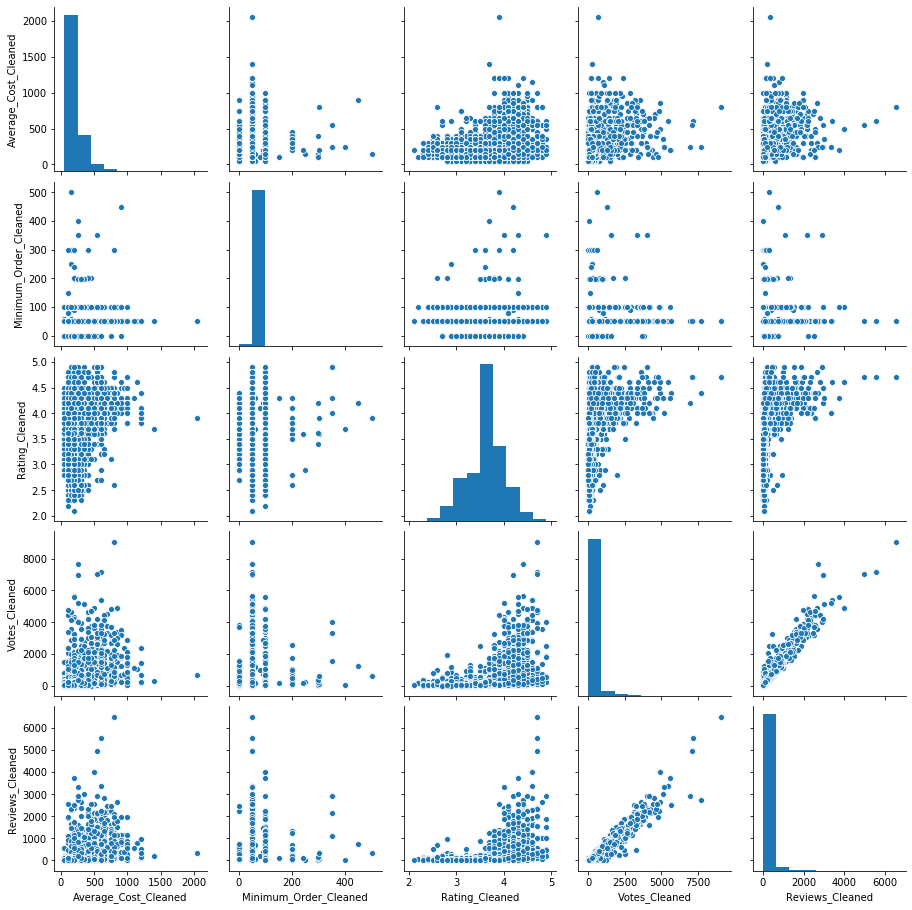

In [50]:
#lets take a look at the relation between the numeric features in the dataset
import seaborn
seaborn.pairplot(train_sample)

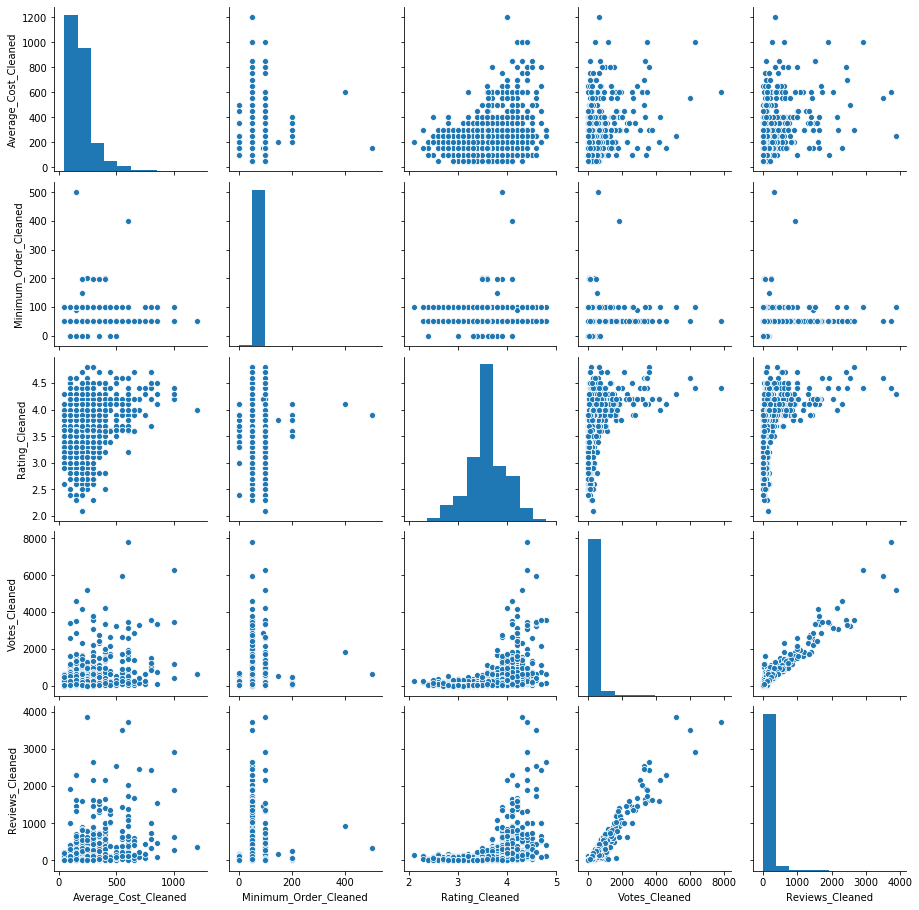

In [51]:
seaborn.pairplot(test_sample)

##Data Preprocessing

After cleaning, there are still some Data-Preparation tasks left. We still have some missing values that we allotted during the feature generation.

In the Preprocessing stage we will perform the following :

* Dealing with Nulls/empty cells
* Encoding Categorical variables
* Scaling the features

### Removing Nulls

In [52]:
train_sample.isnull().sum()

Location_Feature_1           0
Location_Feature_2        1942
Location_Feature_3        6364
Location_Feature_4       10068
Cuisines_Feature_1           0
Cuisines_Feature_2        3012
Cuisines_Feature_3        6931
Cuisines_Feature_4        9393
Cuisines_Feature_5       10449
Cuisines_Feature_6       10854
Cuisines_Feature_7       10978
Cuisines_Feature_8       11046
Restaurant                   0
Average_Cost_Cleaned         0
Minimum_Order_Cleaned        0
Rating_Cleaned               0
Votes_Cleaned                0
Reviews_Cleaned              0
Delivery_Time                0
dtype: int64

Since the nulls are present only in the categorical features, in this approach, to make it simple I will just replace all the NaNs with a string 'NAN' and will use it as a added category or class.

In [0]:
train_sample.fillna('NAN', inplace = True)

In [54]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [55]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [0]:
test_sample.fillna('NAN', inplace = True)

In [57]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

### Encoding Categories



---

Here we will use a simple Label Encoder to transform all the strings or categories.

####Locations & Cuisines

We will first find the unique values or categories in each of the categorical features and fit the label encoder with the unique values. The encoder eill assign an integer code to each of the categories which can be used to tranform the entire categorical feature column.

In [0]:
temp1 = []
for i in train_Cuisines_splits.keys():
  for j in train_Cuisines_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Cuisines_splits.keys():
  for j in test_Cuisines_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_cuisines = list(pd.Series(temp1).unique())
unique_cuisines.append('NAN')

**Note:**
We are also adding an extra category called NAN that we used to replace the NaN values.

In [59]:
len(unique_cuisines)

103

The location is a tricky feature. You can use external data to fill the missing data. For example, if the city is missing you can use the street name and try to find the City for the missing fields.

For simplicity, here I have followed the same approach as I did for Cuisines which is not a perfect solution.

In [0]:
temp1 = []
for i in train_Location_splits.keys():
  for j in train_Location_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Location_splits.keys():
  for j in test_Location_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_locations = list(pd.Series(temp1).unique())
unique_locations.append('NAN')

In [61]:
len(unique_locations)

67

In [0]:
#encoding the categorical Features
from sklearn.preprocessing import LabelEncoder
le_c = LabelEncoder().fit(unique_cuisines)
le_l = LabelEncoder().fit(unique_locations)

In [0]:
for i in train_Location_splits.keys():
  train_sample[i] = le_l.transform(train_sample[i])

In [0]:

for i in train_Cuisines_splits.keys():
  train_sample[i] = le_c.transform(train_sample[i])

In [0]:
for i in train_Location_splits.keys():
  test_sample[i] = le_l.transform(test_sample[i])

In [0]:
for i in test_Cuisines_splits.keys():
  test_sample[i] = le_c.transform(test_sample[i])

####Restaurant IDs

We will follow a similar approach for encoding the Restaurant IDs

In [0]:
t1 = list(train_sample['Restaurant'])
t2 = list(test_sample['Restaurant'])

t1.extend(t2)
unique_ids = list(set(t1))

In [68]:
len(unique_ids)

8661

In [0]:
le_id = LabelEncoder().fit(unique_ids)

In [0]:
train_sample['Restaurant'] = le_id.transform(train_sample['Restaurant'])
test_sample['Restaurant'] = le_id.transform(test_sample['Restaurant'])

### Scaling

We will now normalize the data using the StandardScaler

In [0]:
cols = list(train_sample.columns)

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [0]:
train_sample[cols[:-1]] = ss.fit_transform(train_sample[cols[:-1]])

In [0]:
test_sample[cols[:-1]] = ss.fit_transform(test_sample[cols[:-1]])

In [75]:
train_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned,Delivery_Time
0,-0.867166,-0.408678,1.683093,-0.161374,-0.714599,1.656380,0.137213,3.865914,7.460013,-0.125106,-0.08579,-0.057042,0.625956,-0.020864,-0.180293,-0.301852,-0.464423,-0.417345,30 minutes
1,1.246323,-0.117669,-0.660441,-0.161374,-0.312564,-0.125757,-0.621557,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,-0.897145,-0.791117,-0.180293,-0.301852,-0.466421,-0.417345,30 minutes
2,0.242416,-1.669717,-0.660441,-0.161374,-0.129821,1.953402,0.534663,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,-1.467013,-0.405990,-0.180293,-0.035808,-0.290596,-0.326311,65 minutes
3,1.140649,0.415848,-0.660441,-0.161374,0.637700,1.326354,0.354004,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,0.451808,0.364263,2.461158,0.230235,-0.136749,-0.098724,30 minutes
4,0.982137,-0.602684,2.580618,-0.161374,-1.043537,-0.620795,-0.621557,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,0.538284,-0.020864,2.461158,-1.099981,0.552564,0.391462,65 minutes


In [76]:
test_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,0.083713,1.243494,-0.479103,0.871523,0.809765,-0.204497,-0.346423,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.897086,1.350471,-0.177278,1.612406,0.276837,0.428327
1,0.083713,1.243494,-0.479103,0.871523,-1.302905,0.628995,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,1.096904,-0.833142,-0.177278,0.029586,0.029087,0.035125
2,1.143599,0.416451,-0.673221,-0.151585,-0.746940,-1.104668,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.101583,-0.833142,-0.177278,-0.006736,-0.411358,-0.377352
3,-1.665097,0.367801,-0.236455,-0.151585,0.513250,1.362467,0.393217,1.259565,7.241203,-0.12173,-0.082445,-0.042516,0.278454,0.040303,-0.177278,-0.006736,-0.347833,-0.311818
4,1.143599,0.416451,-0.673221,-0.151585,-0.932262,-0.037799,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.715119,-0.396419,-0.177278,-1.895735,-0.407123,-0.385062


##Modeling

Finally, we are ready for modeling. We will split the training set into training and validation sets.

We will then use the training set to train and validation set to test the performance of the model.

Finally we will use the given test set for predicting.




In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_sample, test_size = 0.1, random_state = 123)

In [0]:
X_train = train[cols[:-1]]
Y_train = train[cols[-1]]

X_Val = val[cols[:-1]]
Y_Val = val[cols[-1]]

X_test = test_sample[cols[:-1]]

In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
xgb.score(X_Val,Y_Val)

0.7216216216216216

In [0]:
Predictions = xgb.predict(X_test)

Lets write the predictions into an excel file for uploading into MachineHack

In [0]:
pd.DataFrame(Predictions, columns = ['Delivery_Time']).to_excel("Submission_1.xlsx", index = False)

Vola ! You now a solution. Upload the file at MachinHack to know your score!

---

This is a baseline model. Fine tuning the model can give better results. Also, tryout different algorithms to find the best.

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [82]:
clf.fit(X_train,Y_train)
clf.score(X_Val,Y_Val)

0.6954954954954955

In [0]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier()

In [84]:
Rforest.fit(X_train,Y_train)
Rforest.score(X_Val,Y_Val)

0.7774774774774775

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
Predictions = Rforest.predict(X_test)

In [0]:
pd.DataFrame(Predictions, columns = ['Delivery_Time']).to_excel("/GD/My Drive/Colab Notebooks/Food Delivery/Participants Data/Submission.xlsx", index = False)